# Problem Definition

To build a predictive model using customer data to forecast the likelihood of a customer churning within a specific period. This model will help the bank in understanding the key factors that influence customer churn and enable them to take preemptive actions to improve customer retention.

#### Goals

- A predictive model capable of accurately identifying customers at risk of churning.
- Insights into the factors that contribute most to customer churn.
- Recommendations for targeted retention strategies to reduce churn and improve customer satisfaction.

#### Data

The dataset consists of historical data of bank customers, including demographic information, account information, transaction details, and customer behavior metrics. Each record represents a unique customer and includes the following features:

- Customer ID: Unique identifier for each customer.
- Surname: Surname of customer.
- Gender: Male or Female.
- Age: Age of the customer.
- Tenure: Number of years the customer has been with the bank.
- Balance: Account balance of the customer.
- CreditScore: Customer's credit score.
- NumOfProducts: Number of products the customer has with the bank.
- IsActiveMember: Whether the customer is an active member.
- EstimatedSalary: Estimated salary of the customer.
- Exited: Whether the customer has churned (0 = No, 1 = Yes).

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Set the overall theme and style
sns.set_theme(style='darkgrid')

# Data Loading

In [5]:
df = pd.read_csv(r"C:\Users\hp\Desktop\AMIT ML\Datasets\csv\Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning: Step 1

- Dropped RowNumber, CustomerID and Surname as they are unique identifiers which wont be used
- No Nulls found
- No Duplication found

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

# EDA

### Univariate Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
num_cols = df.select_dtypes(include='number')

In [15]:
num_cols.drop(labels=['HasCrCard', 'IsActiveMember', 'Exited'], axis=1, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


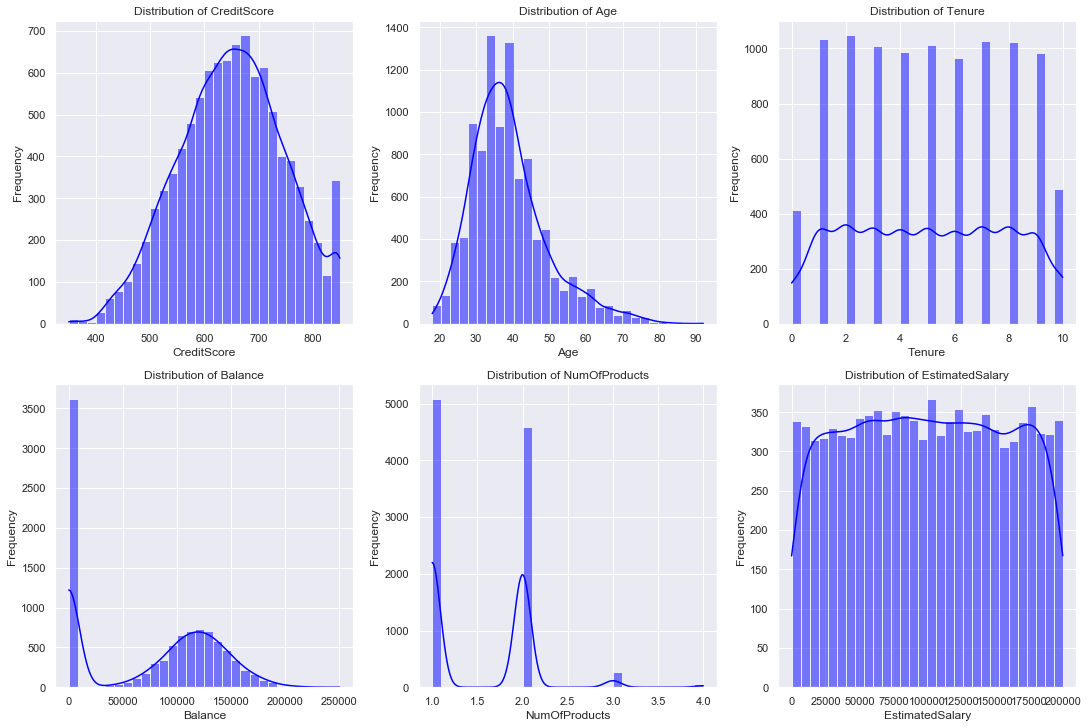

In [16]:
cols = 3
rows = (len(num_cols.columns) + cols - 1) // cols

# Intialize the figure and the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)

axes = axes.flatten()



# Draw Histogram for each column
for idx, col in enumerate(num_cols.columns):
   
    
    
    sns.histplot(df[col], bins=30, color='blue', kde=True,  ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.show()

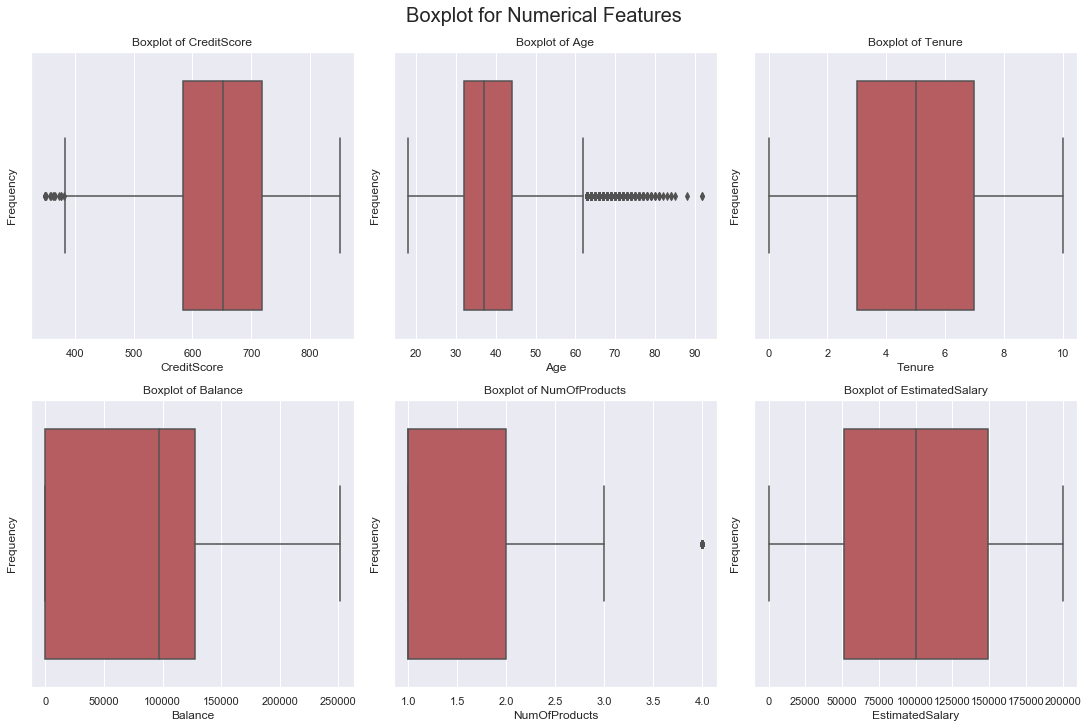

In [17]:
cols = 3
rows = (len(num_cols.columns) + cols - 1) // cols

# Intialize the figure and the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)
plt.suptitle('Boxplot for Numerical Features', fontsize=20)

axes = axes.flatten()



# Draw boxplot for each variable
for idx, col in enumerate(num_cols.columns):
   
    
    
    sns.boxplot(x=df[col], color='r',  ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.show()

In [18]:
# Get count of each Gender in Data

gCount = df['Gender'].value_counts().reset_index()

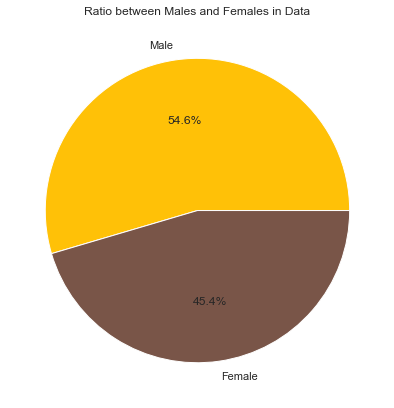

In [19]:
colors = ['#FFC107', '#795548']
# Pie plot for Male and Female ratio

plt.figure(figsize=(12,7))
plt.pie(gCount['Gender'], labels=gCount['index'], autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title('Ratio between Males and Females in Data')
plt.show()

In [20]:
# Get count of each country in data
cCount = df['Geography'].value_counts().reset_index()

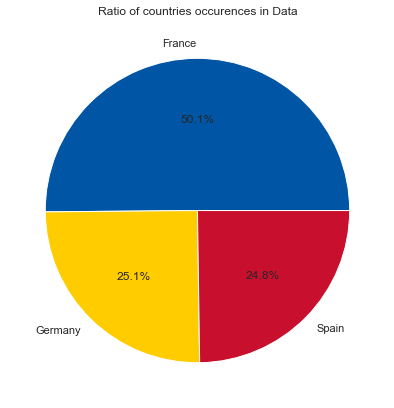

In [21]:
colors = ['#0055A4', '#FFCC00', '#C8102E']

# Pie plot for the percentage of occurence of each country
plt.figure(figsize=(12,7))
plt.pie(cCount['Geography'], labels=cCount['index'], autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title('Ratio of countries occurences in Data')
plt.show()

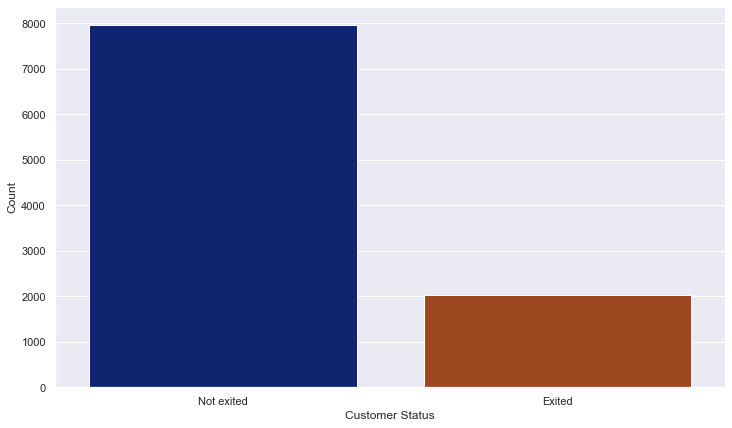

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(df, x='Exited', palette='dark')
plt.xticks(ticks=[0,1], labels=['Not exited', 'Exited'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

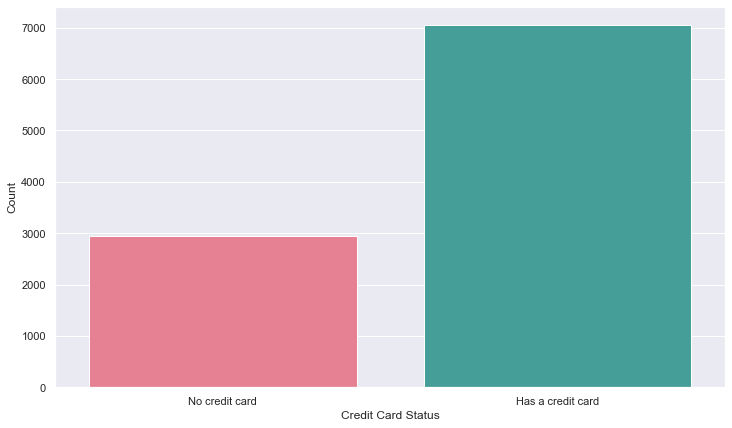

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x='HasCrCard', data=df, palette='husl')
plt.xticks(ticks=[0,1], labels=['No credit card', 'Has a credit card'])
plt.xlabel('Credit Card Status')
plt.ylabel('Count')
plt.show()

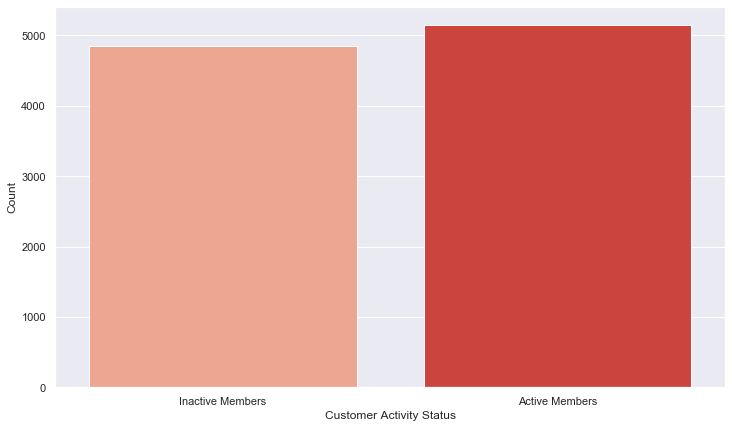

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x='IsActiveMember', data=df, palette='Reds')
plt.xticks(ticks=[0,1], labels=['Inactive Members', 'Active Members'])
plt.xlabel('Customer Activity Status')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

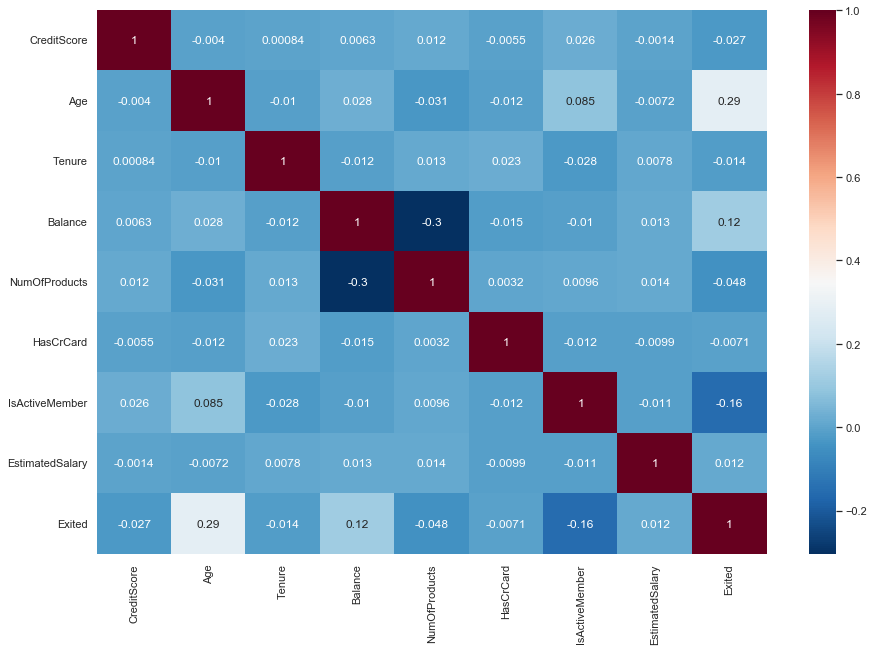

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r')
plt.show()

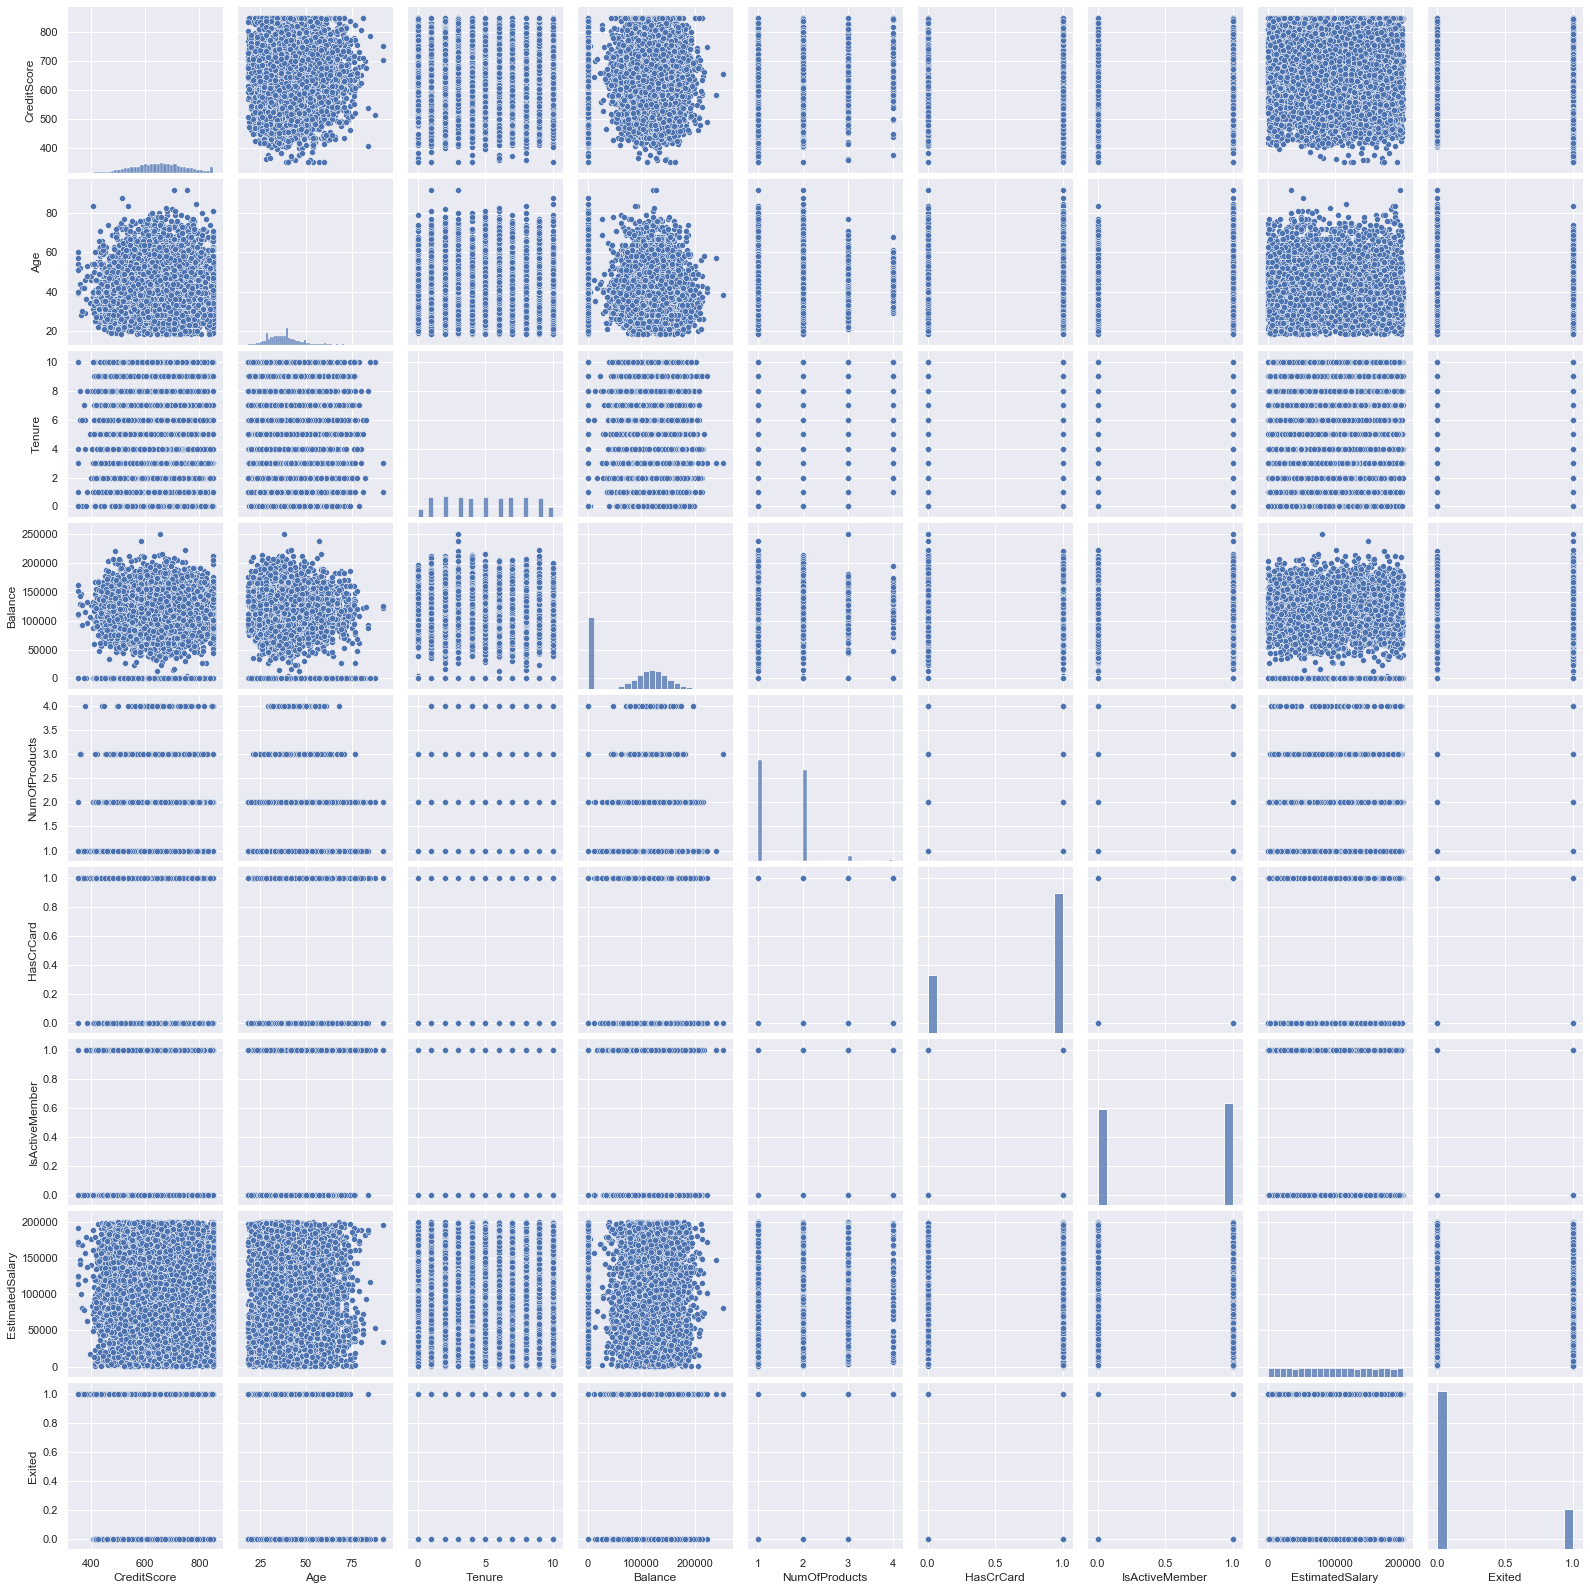

In [26]:
sns.pairplot(df)
plt.show()

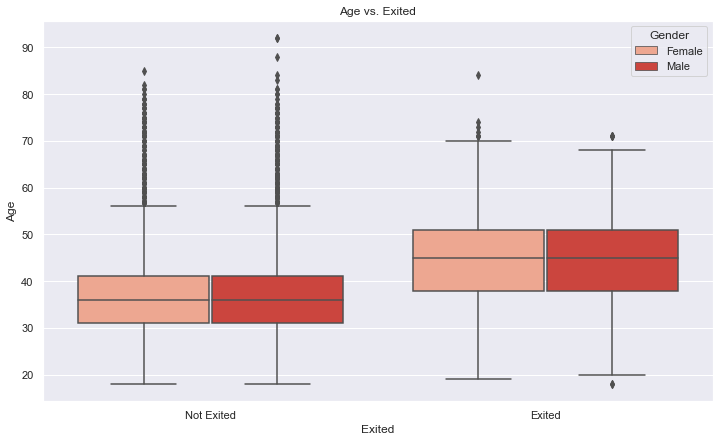

In [27]:
# Box plot for Age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Exited', y='Age', data=df, hue='Gender', palette='Reds')
plt.xticks(ticks=[0,1], labels=['Not Exited', 'Exited'])
plt.title('Age vs. Exited')
plt.show()

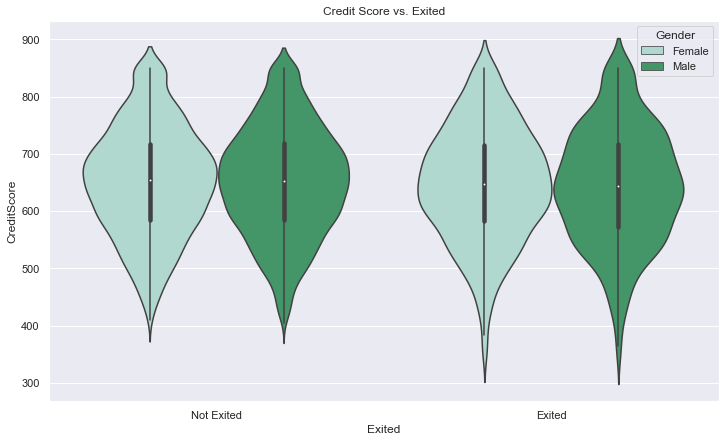

In [28]:
# Violin plot for Credit Score
plt.figure(figsize=(12, 7))
sns.violinplot(x='Exited', y='CreditScore', data=df, hue='Gender', palette='BuGn')

plt.xticks(ticks=[0,1], labels=['Not Exited', 'Exited'])
plt.title('Credit Score vs. Exited')
plt.show()

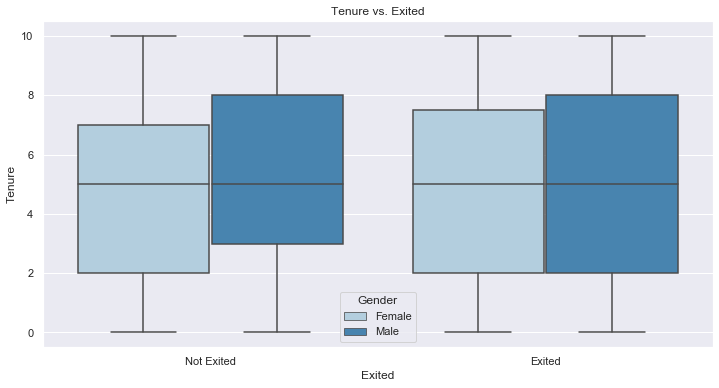

In [29]:
# Violin plot for Tenure
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Tenure', data=df, hue='Gender', palette='Blues')
plt.xticks(ticks=[0,1], labels=['Not Exited', 'Exited'])
plt.title('Tenure vs. Exited')
plt.show()

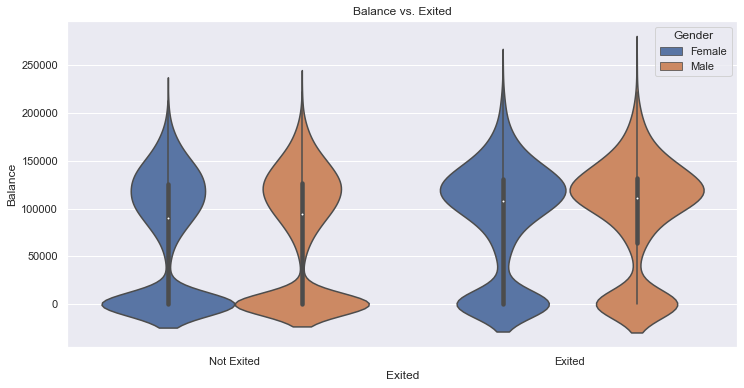

In [30]:
# Violin plot for Balance
plt.figure(figsize=(12, 6))
sns.violinplot(x='Exited', y='Balance', data=df, hue='Gender')
plt.xticks(ticks=[0,1], labels=['Not Exited', 'Exited'])
plt.title('Balance vs. Exited')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


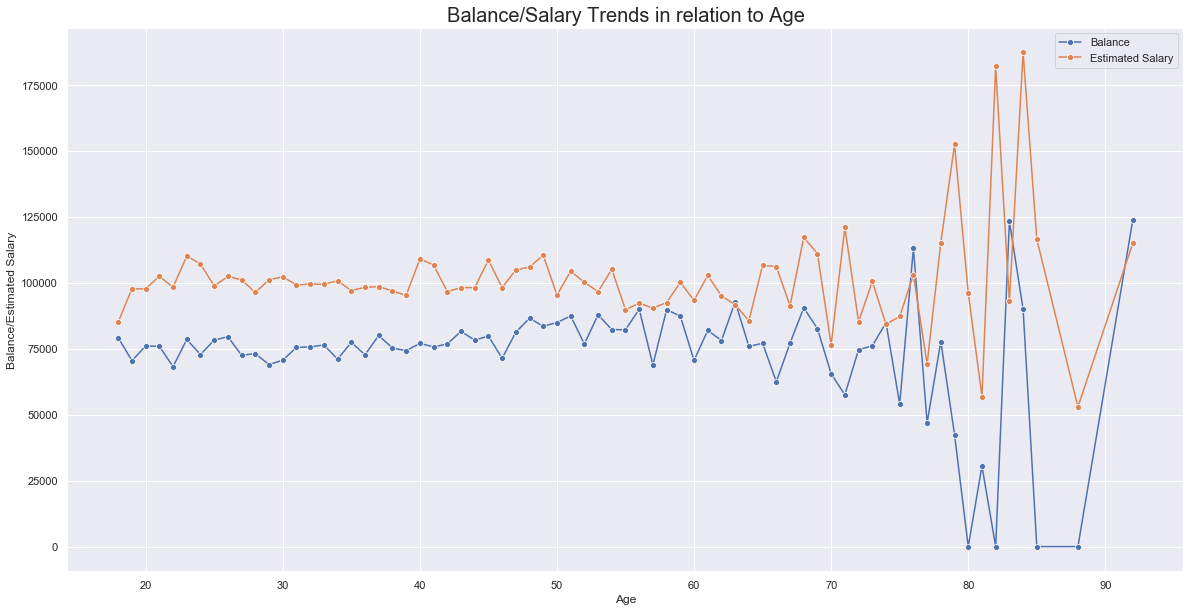

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(df, x='Age', y='Balance', label='Balance', ci=None, marker='o')
sns.lineplot(df, x='Age', y='EstimatedSalary', label='Estimated Salary', ci=None, marker='o')
plt.ylabel('Balance/Estimated Salary')
plt.title('Balance/Salary Trends in relation to Age', fontsize=20)
plt.legend()
plt.show()

In [32]:
df[df['Balance'] == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


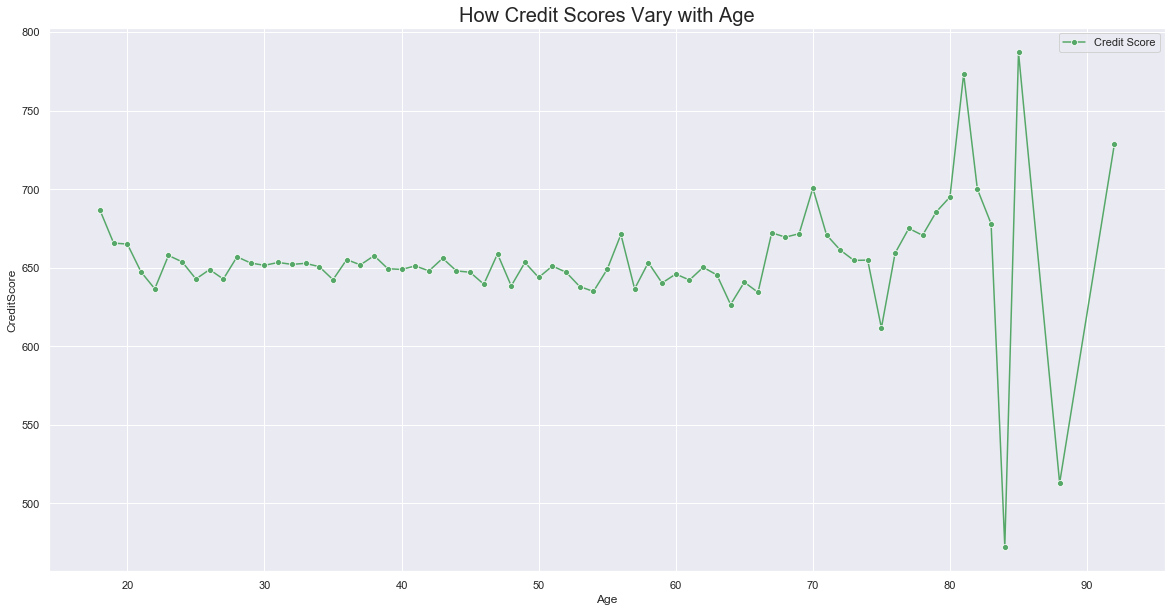

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(df, x='Age', y='CreditScore', label='Credit Score', ci=None, marker='o', color='g')
plt.title('How Credit Scores Vary with Age', fontsize=20)
plt.show()

In [34]:
df[df['Age'] > 80]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
766,700,France,Female,82,2,0.00,2,0,1,182055.36,0
2458,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
4931,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
7526,850,France,Female,81,1,0.00,2,1,1,59568.24,0
7956,850,France,Male,81,5,0.00,2,1,1,44827.47,0


In [35]:
ve = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

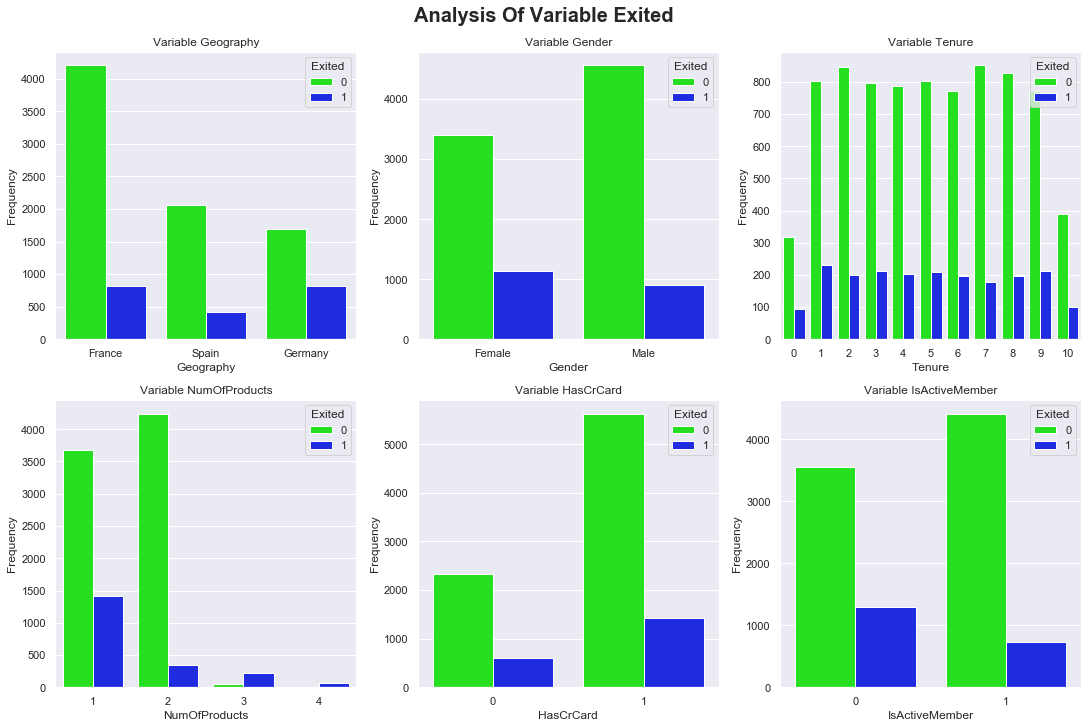

In [36]:
cols = 3
rows = (len(ve) + cols - 1) // cols

# Intialize the figure and the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)
axes = axes.flatten()



# Draw Histogram for each column
for idx, col in enumerate(ve):
   
    sns.countplot(x=df[col], color='r', hue=df['Exited'],  ax=axes[idx], palette='hsv')
    axes[idx].set_title(f'Variable {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.show()

# Feature Engineering

### Feature Preprocessing

In [37]:
# One hot encoding category variables

hot = pd.get_dummies(df[['Geography', 'Gender']])

In [38]:
# Adding encoded variables to DF
df = pd.concat([df, hot], axis=1)

In [89]:
# Dividing data to input and target

X = df.drop(columns=['Geography', 'Gender', 'Exited'], axis=1)
y = df['Exited']

In [90]:
scaler = StandardScaler()

In [91]:
X_scaled = scaler.fit_transform(X)

# Train Test Split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Classification

In [93]:
# INI DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

In [94]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = clf.predict(X_test)

In [96]:
y_test

6417    0
199     0
2051    0
8481    0
1071    0
       ..
9593    0
7289    0
4728    0
3617    1
9704    0
Name: Exited, Length: 3000, dtype: int64

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.791

In [98]:
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=X_train.columns,  rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 720x432 with 0 Axes>

# Grid Search for decision tree

In [99]:
# PRUNING DECISION TREE
param_grid = {
   'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10]
}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [100]:
best_params= grid_search.best_params_
best_score=grid_search.best_score_
print('Best Params:', best_params)
print('Best Score:', best_score)

Best Params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8559000000000001


In [101]:
print('Best Params:', best_params)
print('Best Score:', best_score)

Best Params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8559000000000001


# Best tree after grid search

In [102]:
best_tree_reg = DecisionTreeClassifier(**best_params)

In [103]:
best_tree_reg.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

In [104]:
y_pred = best_tree_reg.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.859

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(best_tree_reg, filled=True, feature_names=X_train.columns,  rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=3, scoring='accuracy')

array([0.79064187, 0.79027903, 0.78547855])

In [107]:
cross_val_score(best_tree_reg, X, y, cv=3, scoring='accuracy')

array([0.85662867, 0.84938494, 0.85178518])

# Using RandomForest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc = RandomForestClassifier(max_depth=7, random_state=42)

In [110]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [111]:
y_pred = rfc.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.86

In [113]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [114]:
rfc_best = RandomForestClassifier(**best_params)

In [115]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=150)

In [116]:
y_pred = rfc_best.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.8663333333333333

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.47      0.59       611

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



# Balancing Data

In [119]:
value_counts = df['Exited'].value_counts()

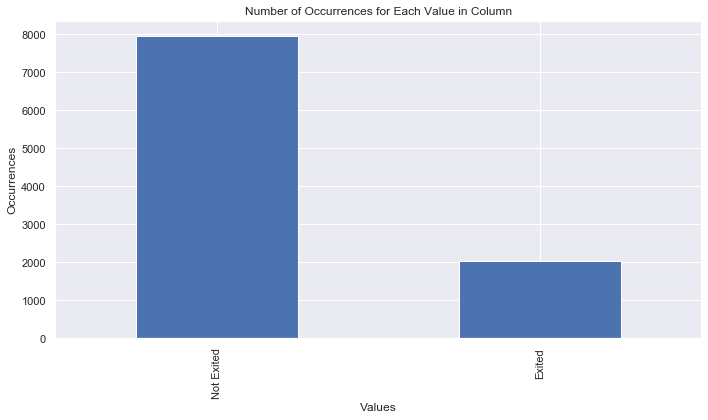

In [120]:
plt.figure(figsize=(10,6))
value_counts.plot(kind='bar')
plt.title('Number of Occurrences for Each Value in Column')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.xticks(ticks=[0,1], labels=['Not Exited', 'Exited'])
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Deep Learning Model

In [121]:
from keras.models import Sequential,Model,load_model
from keras.optimizers import SGD
from keras.layers import ( BatchNormalization, Lambda, Input, Dense, Dropout )

In [122]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [123]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [124]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
219/219 [==============================] - 1s 1ms/step - loss: 0.6878 - accuracy: 0.6026
Epoch 2/5
219/219 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7957
Epoch 3/5
219/219 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7963
Epoch 4/5
219/219 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7963
Epoch 5/5
219/219 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.7963


In [125]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.5027369260787964
Test Accuracy: 0.7963333129882812


In [126]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, validation_data=(X_test, y_test))



Epoch 1/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4531 - accuracy: 0.8090 - val_loss: 0.3664 - val_accuracy: 0.8580
Epoch 2/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.3716 - accuracy: 0.8451 - val_loss: 0.3695 - val_accuracy: 0.8467
Epoch 3/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3619 - accuracy: 0.8477 - val_loss: 0.3431 - val_accuracy: 0.8583
Epoch 4/10
7000/7000 [==============================] - 15s 2ms/step - loss: 0.3573 - accuracy: 0.8521 - val_loss: 0.3441 - val_accuracy: 0.8617
Epoch 5/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.3564 - accuracy: 0.8559 - val_loss: 0.3386 - val_accuracy: 0.8633
Epoch 6/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3515 - accuracy: 0.8583 - val_loss: 0.3473 - val_accuracy: 0.8607
Epoch 7/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.3514 - accuracy: 0.8567 - val_loss: 0.3437 - val_ac

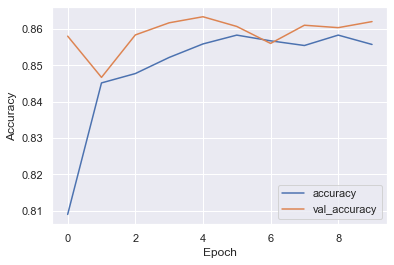

In [127]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [128]:
predictions = model.predict(X_test)

binary_predictions = predictions.astype(int)

94/94 [==============================] - 0s 848us/step


In [129]:
predictions > 0.5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [130]:
# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7963333333333333
